In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install scikit-learn
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##1. Import the required libraries and load the training and testing dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import plotly as py
from datetime import datetime
import calendar
from scipy import stats

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor # calling model
from sklearn.ensemble import GradientBoostingRegressor

# Regressors considered:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error

Output hidden; open in https://colab.research.google.com to view.

In [3]:
#Replace the file path for the dataset
#example
train = pd.read_csv(r'C:\Users\alanm\Desktop\Dataset\train.csv')
train_label=pd.read_csv(r' ')
test=pd.read_csv(r' ')
test_label=pd.read_csv(r' ')

FileNotFoundError: ignored

##2. Analyze the dataset and write your observations 

##a. Check the shape of the training and testing set

In [ ]:
print(train.shape)
print(train_label.shape)
print(test.shape)
print(test_label.shape)

(8708, 9)
(8708, 1)
(2178, 9)
(2179, 1)


##b. Print the data types of each column

In [ ]:
print('Train.csv')
print(train.dtypes)
print('-------------------------------------')
print('Train_label.csv')
print(train_label.dtypes)
print('-------------------------------------')
print('Test.csv')
print(test.dtypes)
print('-------------------------------------')
print('Test_label.csv')
print(test_label.dtypes)
print('-------------------------------------')

Train.csv
datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object
-------------------------------------
Train_label.csv
TotalBooking    int64
dtype: object
-------------------------------------
Test.csv
datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object
-------------------------------------
Test_label.csv
TotalBooking    int64
dtype: object
-------------------------------------


## c.Check the missing values present in the dataset

In [ ]:
train_m=print(train.isnull().sum())
train_label_m=print(train.isnull().sum())
test_m=print(train.isnull().sum())
test_label_m=print(train.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


## 3.Perform Feature Engineering: 

## a. Create new columns date, hour, weekDay, month from datetime column

In [ ]:
train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"]= train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"]= train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"]= test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"]= test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September


## b. Coerce the datatype of season, holiday, workingday, and weather to category


In [ ]:
columns_to_coerce = ['season', 'holiday', 'workingday', 'weather']
train[columns_to_coerce] = train[columns_to_coerce].astype('category')
test[columns_to_coerce] = test[columns_to_coerce].astype('category')

In [ ]:
print(train[columns_to_coerce].dtypes)
print(test[columns_to_coerce].dtypes)

season        category
holiday       category
workingday    category
weather       category
dtype: object
season        category
holiday       category
workingday    category
weather       category
dtype: object


##c. Drop the datetime column as we have already extracted useful features from it

In [ ]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [ ]:
train.head()
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,5/10/2012,11,Thursday,May
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,6/9/2012,7,Saturday,June
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,3/6/2011,20,Sunday,March
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,10/13/2011,11,Thursday,October
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,6/2/2012,12,Saturday,June


## 4. Perform Outlier Analysis: 
## a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference


In [ ]:
test['TotalBooking'] = test_label
train['TotalBooking']= train_label

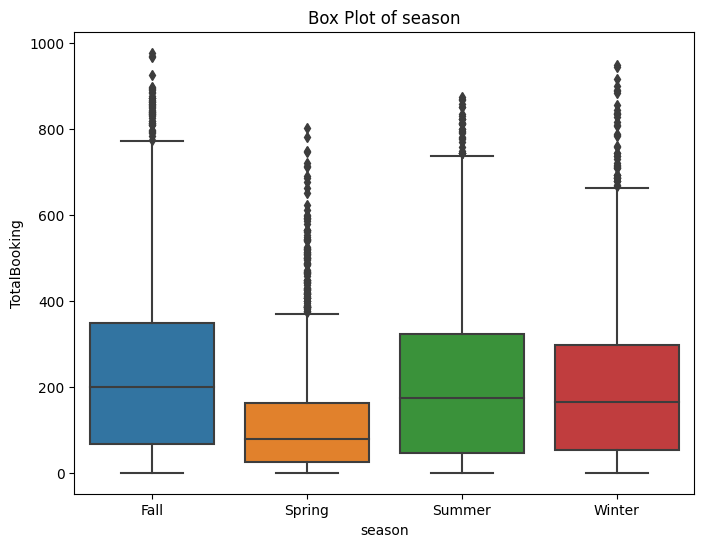

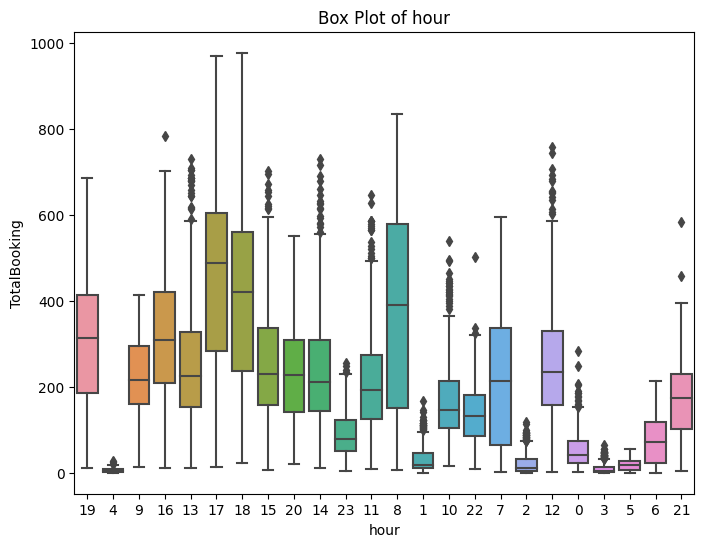

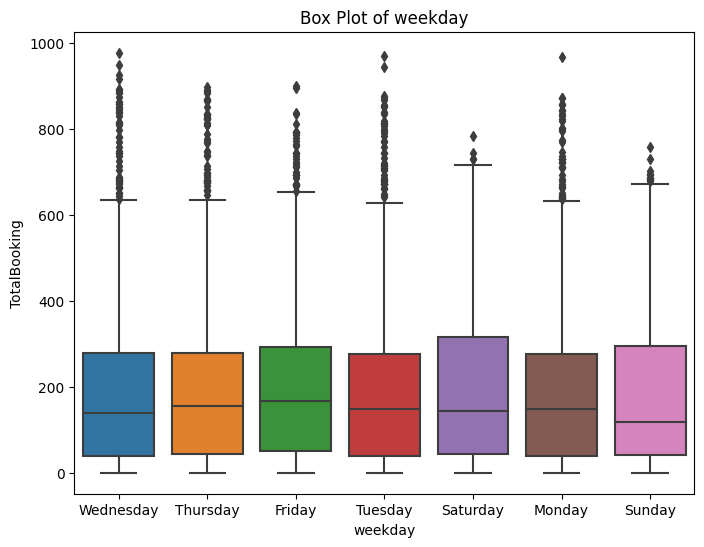

In [ ]:
features = ['season', 'hour', 'weekday']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='TotalBooking', data=train)
    plt.title(f'Box Plot of {feature}')
    plt.show()

##b. Remove the outliers present in the dataset

In [ ]:
rev_stat=train.TotalBooking.describe()
print(rev_stat)
# calculating interquartile range
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print()
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: TotalBooking, dtype: float64

The upper and lower bounds for suspected outliers are -321.5 and 650.5


In [ ]:
outliers=train[train.TotalBooking>upper].index.tolist()
train[train.TotalBooking>upper]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,TotalBooking
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,8/17/2012,17,Friday,August,791
27,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,5/2/2012,18,Wednesday,May,813
30,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,7/10/2012,17,Tuesday,July,872
52,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,6/5/2012,18,Tuesday,June,790
70,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,5/18/2012,18,Friday,May,669
82,Spring,0,1,Mist + Cloudy,24.60,31.060,43,12.9980,3/12/2012,18,Monday,March,712
105,Fall,0,1,Mist + Cloudy,27.06,30.305,83,36.9974,9/18/2012,8,Tuesday,September,672
112,Winter,0,0,Clear + Few clouds,22.14,25.760,42,15.0013,11/11/2012,16,Sunday,November,653
125,Winter,0,1,Clear + Few clouds,15.58,19.695,94,0.0000,12/18/2012,8,Tuesday,December,662
133,Fall,0,0,Mist + Cloudy,27.06,31.060,36,16.9979,9/15/2012,17,Saturday,September,729


##5. Perform Correlation Analysis: 
#a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity","windspeed"]

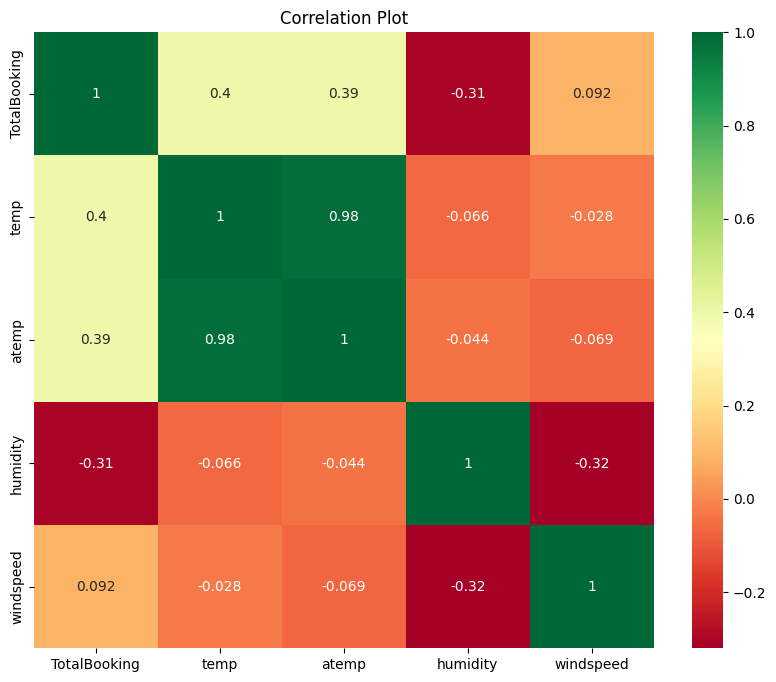

In [ ]:
columns_of_interest = ["TotalBooking", "temp", "atemp", "humidity", "windspeed"]

correlation_matrix = train[columns_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Plot")
plt.show()

## b. Write down your inference in the markdown cell
atem-how the temperature feels like

There is a direct corealation between temp and atemp

There is a partial corelation between temp & atemp with TotalBooking

There is no corelation between humidity and TotalBooking




## 6. Perform Data Visualization:
## a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well


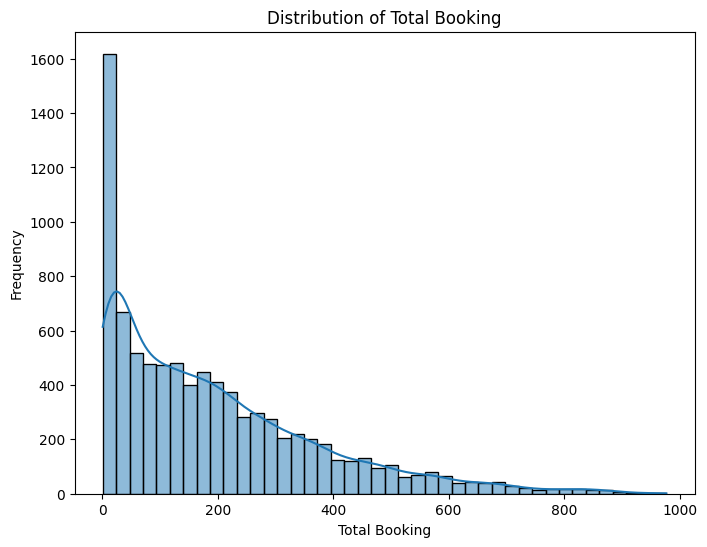

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x="TotalBooking", kde=True)
plt.title("Distribution of Total Booking")
plt.xlabel("Total Booking")
plt.ylabel("Frequency")
plt.show()

##b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

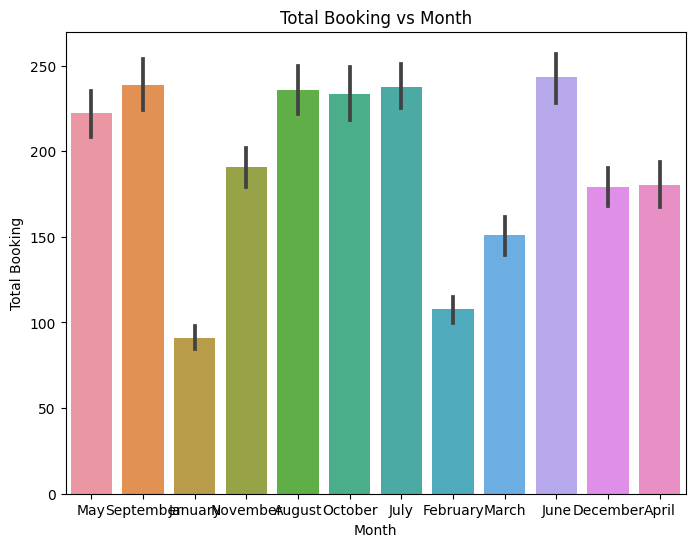

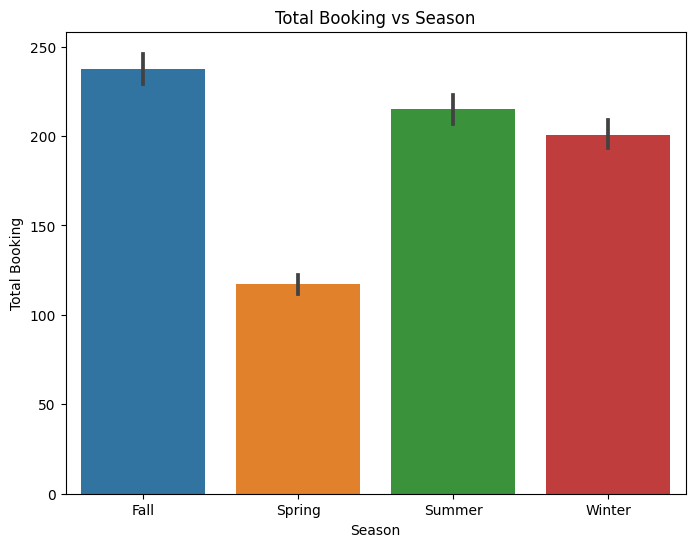

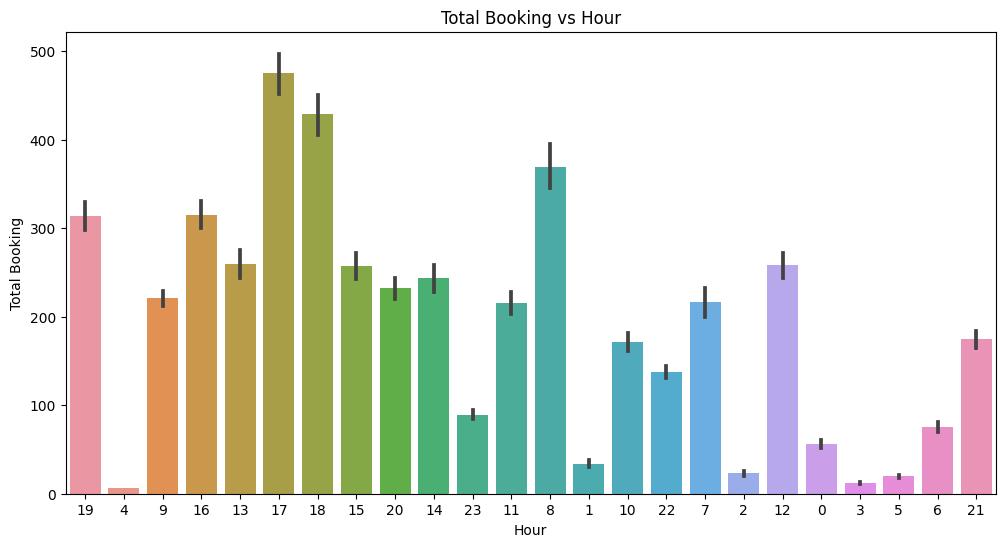

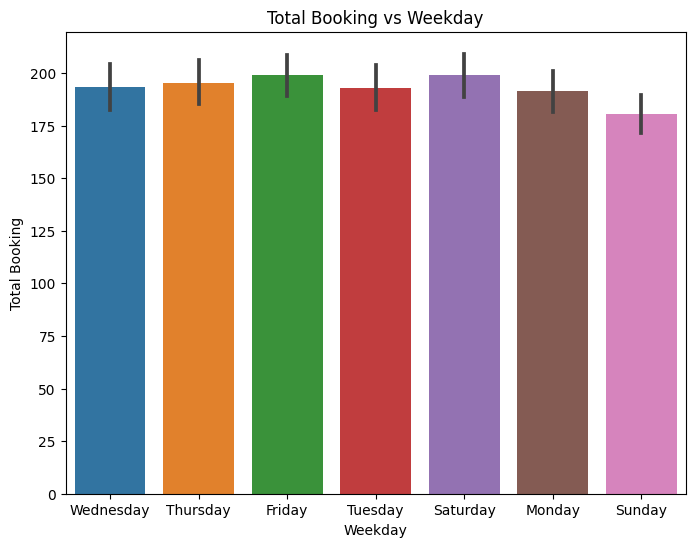

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train, x="month", y="TotalBooking")
plt.title("Total Booking vs Month")
plt.xlabel("Month")
plt.ylabel("Total Booking")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=train, x="season", y="TotalBooking")
plt.title("Total Booking vs Season")
plt.xlabel("Season")
plt.ylabel("Total Booking")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=train, x="hour", y="TotalBooking")
plt.title("Total Booking vs Hour")
plt.xlabel("Hour")
plt.ylabel("Total Booking")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=train, x="weekday", y="TotalBooking")
plt.title("Total Booking vs Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Booking")
plt.show()

## c. Use Histograms to plot all the continuous variables present in the data


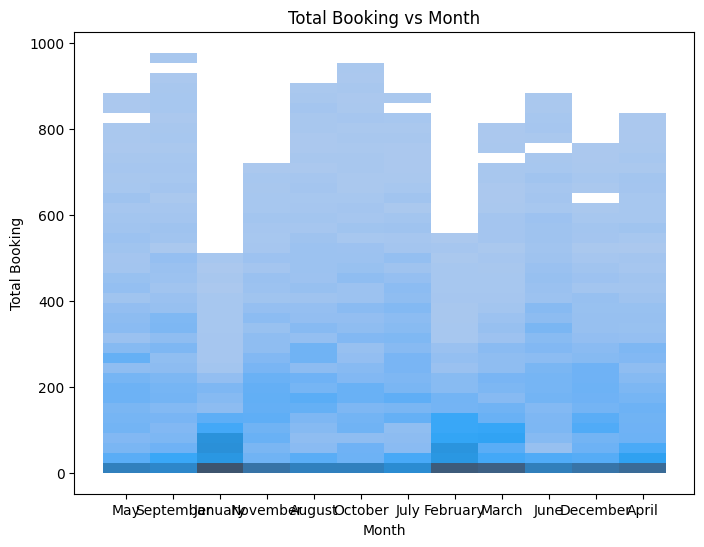

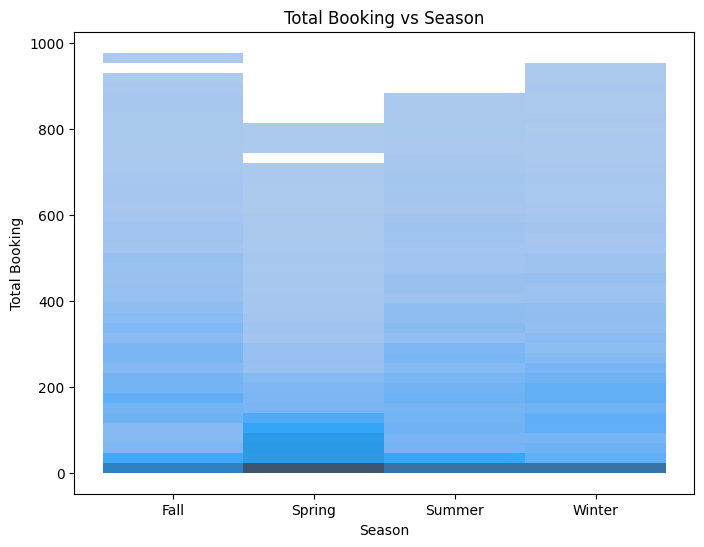

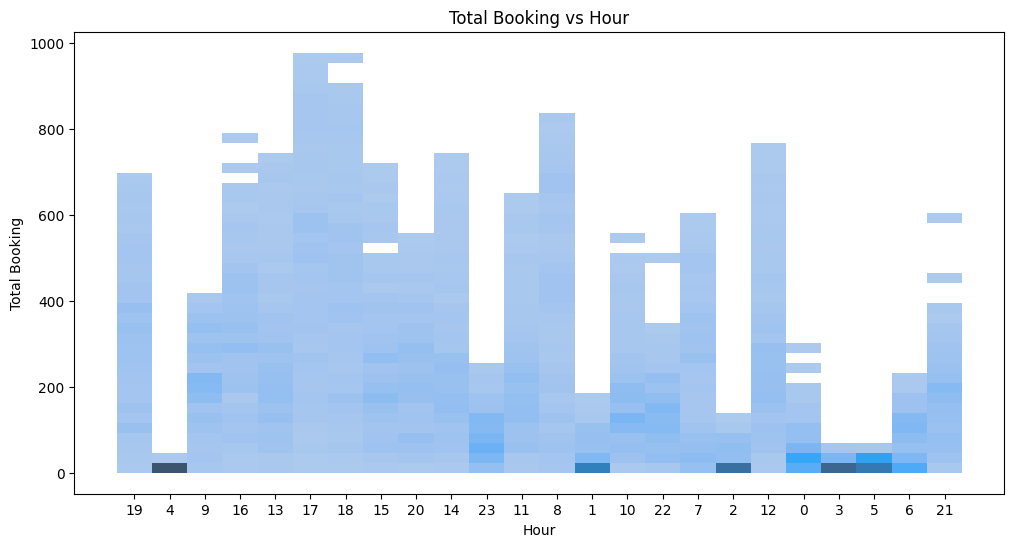

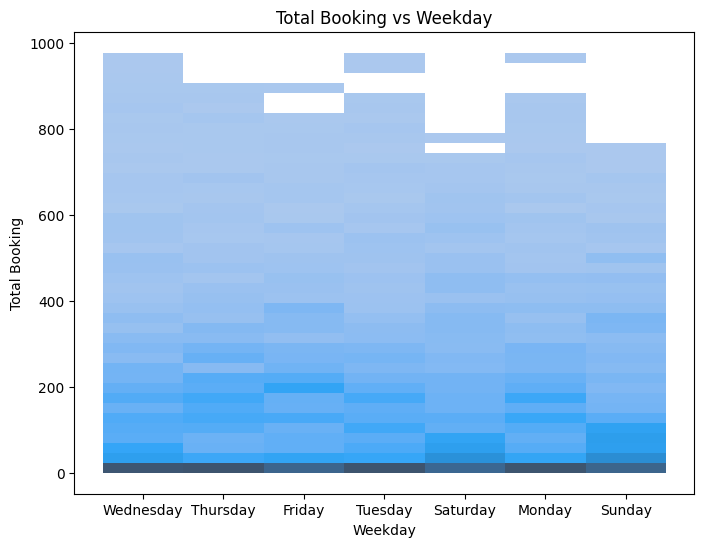

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x="month", y="TotalBooking")
plt.title("Total Booking vs Month")
plt.xlabel("Month")
plt.ylabel("Total Booking")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=train, x="season", y="TotalBooking")
plt.title("Total Booking vs Season")
plt.xlabel("Season")
plt.ylabel("Total Booking")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=train, x="hour", y="TotalBooking")
plt.title("Total Booking vs Hour")
plt.xlabel("Hour")
plt.ylabel("Total Booking")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=train, x="weekday", y="TotalBooking")
plt.title("Total Booking vs Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Booking")
plt.show()

## 7. Convert the categorical variables into one hot vector

In [ ]:
train_encoded = pd.get_dummies(train)
print(train_encoded.head())

    temp   atemp  humidity  windspeed  TotalBooking  season_Fall  season_Spring  season_Summer  season_Winter  holiday_0  holiday_1  workingday_0  workingday_1  weather_ Clear + Few clouds  weather_ Heavy Rain + Thunderstorm   weather_ Light Snow, Light Rain  weather_ Mist + Cloudy   date_1/1/2011  date_1/1/2012  date_1/10/2011  date_1/10/2012  date_1/11/2011  date_1/11/2012  date_1/12/2011  date_1/12/2012  date_1/13/2011  date_1/13/2012  date_1/14/2011  date_1/14/2012  date_1/15/2011  date_1/15/2012  date_1/16/2011  date_1/16/2012  date_1/17/2011  date_1/17/2012  date_1/18/2011  date_1/18/2012  date_1/19/2011  date_1/19/2012  date_1/2/2011  date_1/2/2012  date_1/3/2011  date_1/3/2012  date_1/4/2011  date_1/4/2012  date_1/5/2011  date_1/5/2012  date_1/6/2011  date_1/6/2012  date_1/7/2011  date_1/7/2012  date_1/8/2011  date_1/8/2012  date_1/9/2011  date_1/9/2012  date_10/1/2011  date_10/1/2012  date_10/10/2011  date_10/10/2012  date_10/11/2011  date_10/11/2012  date_10/12/2011   
0  22.

## 8. Split your dataset for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_encoded, train_label, test_size=0.2, random_state=42)

# Display the shapes of the subsets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6966, 516)
Shape of X_test: (1742, 516)
Shape of y_train: (6966, 1)
Shape of y_test: (1742, 1)


## 9.Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor()
ada_regressor.fit(X_train, y_train)
ada_predictions = ada_regressor.predict(X_test)

# Bagging Regressor
bag_regressor = BaggingRegressor()
bag_regressor.fit(X_train, y_train)
bag_predictions = bag_regressor.predict(X_test)

# SVR
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
svr_predictions = svr_regressor.predict(X_test)

# K-Neighbors Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
knn_predictions = knn_regressor.predict(X_test)

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
ada_mse = mean_squared_error(y_test, ada_predictions)
bag_mse = mean_squared_error(y_test, bag_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
ada_mae = mean_absolute_error(y_test, ada_predictions)
bag_mae = mean_absolute_error(y_test, bag_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

rf_r2 = r2_score(y_test, rf_predictions)
ada_r2 = r2_score(y_test, ada_predictions)
bag_r2 = r2_score(y_test, bag_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Display the evaluation results
print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)
print()

print("AdaBoost Regression:")
print("Mean Squared Error:", ada_mse)
print("Mean Absolute Error:", ada_mae)
print("R^2 Score:", ada_r2)
print()

print("Bagging Regression:")
print("Mean Squared Error:", bag_mse)
print("Mean Absolute Error:", bag_mae)
print("R^2 Score:", bag_r2)
print()

print("SVR:")
print("Mean Squared Error:", svr_mse)
print("Mean Absolute Error:", svr_mae)
print("R^2 Score:", svr_r2)
print()

print("K-Neighbors Regression:")
print("Mean Squared Error:", knn_mse)
print("Mean Absolute Error:", knn_mae)
print("R^2 Score:", knn_r2)
print()


C:\Users\alanm\AppData\Local\Temp\ipykernel_6616\365519232.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Random Forest Regression:
Mean Squared Error: 0.12806785304248036
Mean Absolute Error: 0.06889781859931014
R^2 Score: 0.9999962835149474

AdaBoost Regression:
Mean Squared Error: 250.93881578765897
Mean Absolute Error: 13.178477917649825
R^2 Score: 0.9927178418640946

Bagging Regression:
Mean Squared Error: 0.2575200918484497
Mean Absolute Error: 0.09414466130884129
R^2 Score: 0.9999925268554961

SVR:
Mean Squared Error: 1411.6493630305106
Mean Absolute Error: 7.8253715011568685
R^2 Score: 0.9590344209532857

K-Neighbors Regression:
Mean Squared Error: 3.6516647531572906
Mean Absolute Error: 1.4571756601607346
R^2 Score: 0.9998940299446766



## 10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm

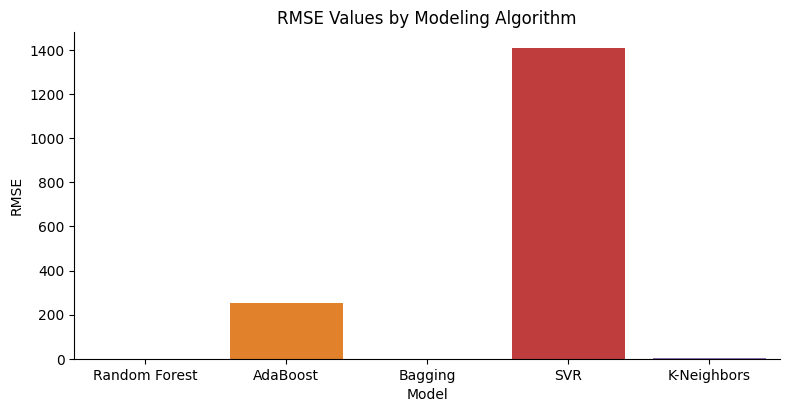

In [ ]:
rmse_data = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'Bagging', 'SVR', 'K-Neighbors'],
    'RMSE': [rf_mse, ada_mse, bag_mse, svr_mse, knn_mse]
})

# Plot the factor plot
sns.catplot(x='Model', y='RMSE', data=rmse_data, kind='bar', height=4, aspect=2)

# Set the plot title and labels
plt.title('RMSE Values by Modeling Algorithm')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Display the plot
plt.show()


## 11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_ 

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create an instance of the best model (Random Forest Regressor in this example)
best_model = RandomForestRegressor()

# Create a GridSearchCV object with the best model and hyperparameters grid
grid_search = GridSearchCV(best_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object on the training data


In [ ]:
grid_search.fit(X_train, y_train)

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\alanm\anaconda3

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## 12. Perform prediction on the test set and print the mean_squared_log_error

In [ ]:
predictions = grid_search.predict(X_test)

# Calculate the mean squared logarithmic error
msle = mean_squared_log_error(y_test, predictions)

# Print the MSLE
print("Mean Squared Logarithmic Error:", msle)

Mean Squared Logarithmic Error: 2.7832075329870405e-07
